In [50]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
from tensorflow import keras
from tensorflow.keras import backend as clear
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

# Functions for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/Users/weiziyao/opt/anaconda3/envs/Tensorflow/lib/python3.8/site-packages/sklearn/metrics/__init__.py)

In [11]:
df = pd.read_csv('Titanic_assignment_data_1.csv')
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,female,NaN,0,0,7.7500,Q,no
1,3,female,19.0,0,0,7.8792,Q,yes
2,1,male,37.0,1,1,83.1583,C,yes
3,1,female,48.0,1,0,106.4250,C,yes
4,3,male,16.0,0,0,8.0500,S,no
...,...,...,...,...,...,...,...,...
1042,1,female,36.0,1,2,120.0000,S,yes
1043,1,female,39.0,1,1,83.1583,C,yes
1044,3,male,23.0,0,0,7.0500,S,yes
1045,3,female,36.0,1,0,17.4000,S,yes


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1047 non-null   int64  
 1   Sex       1047 non-null   object 
 2   Age       803 non-null    float64
 3   SibSp     1047 non-null   int64  
 4   Parch     1047 non-null   int64  
 5   Fare      1046 non-null   float64
 6   Embarked  1047 non-null   object 
 7   Survived  1047 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 65.6+ KB


In [13]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,1047.000000,803.000000,1047.000000,1047.000000,1046.00000
mean,2.299904,30.259029,0.489971,0.356256,32.14890
std,0.837591,14.370157,0.998874,0.783504,51.46746
min,1.000000,1.000000,0.000000,0.000000,0.00000
25%,2.000000,21.000000,0.000000,0.000000,7.89580
50%,3.000000,28.000000,0.000000,0.000000,14.42710
75%,3.000000,39.000000,1.000000,0.000000,30.05310
max,3.000000,80.000000,8.000000,9.000000,512.32920


In [15]:
df[['Pclass']]=df[['Pclass']].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1047 non-null   object 
 1   Sex       1047 non-null   object 
 2   Age       803 non-null    float64
 3   SibSp     1047 non-null   int64  
 4   Parch     1047 non-null   int64  
 5   Fare      1046 non-null   float64
 6   Embarked  1047 non-null   object 
 7   Survived  1047 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 65.6+ KB


In [16]:
df.describe()

,Age,SibSp,Parch,Fare
count,803.000000,1047.000000,1047.000000,1046.00000
mean,30.259029,0.489971,0.356256,32.14890
std,14.370157,0.998874,0.783504,51.46746
min,1.000000,0.000000,0.000000,0.00000
25%,21.000000,0.000000,0.000000,7.89580
50%,28.000000,0.000000,0.000000,14.42710
75%,39.000000,1.000000,0.000000,30.05310
max,80.000000,8.000000,9.000000,512.32920


In [17]:
df.describe(include='all')

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,1047,1047,803.000000,1047.000000,1047.000000,1046.00000,1047,1047
unique,3,2,NaN,NaN,NaN,NaN,3,2
top,3,male,NaN,NaN,NaN,NaN,S,no
freq,571,702,NaN,NaN,NaN,NaN,738,677
mean,NaN,NaN,30.259029,0.489971,0.356256,32.14890,NaN,NaN
std,NaN,NaN,14.370157,0.998874,0.783504,51.46746,NaN,NaN
min,NaN,NaN,1.000000,0.000000,0.000000,0.00000,NaN,NaN
25%,NaN,NaN,21.000000,0.000000,0.000000,7.89580,NaN,NaN
50%,NaN,NaN,28.000000,0.000000,0.000000,14.42710,NaN,NaN
75%,NaN,NaN,39.000000,1.000000,0.000000,30.05310,NaN,NaN


In [18]:
print(df[['Pclass']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Sex']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Embarked']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Survived']].value_counts(sort=True))

Pclass
3         571
1         257
2         219
dtype: int64
+-----------------------+
Sex   
male      702
female    345
dtype: int64
+-----------------------+
Embarked
S           738
C           211
Q            98
dtype: int64
+-----------------------+
Survived
no          677
yes         370
dtype: int64


In [19]:
df[['Age','SibSp','Parch','Fare']].describe()
#df.loc[:,['Age','SibSp','Parch','Fare']].describe()
#df.iloc[:,[2,3,4,5]].describe()

,Age,SibSp,Parch,Fare
count,803.000000,1047.000000,1047.000000,1046.00000
mean,30.259029,0.489971,0.356256,32.14890
std,14.370157,0.998874,0.783504,51.46746
min,1.000000,0.000000,0.000000,0.00000
25%,21.000000,0.000000,0.000000,7.89580
50%,28.000000,0.000000,0.000000,14.42710
75%,39.000000,1.000000,0.000000,30.05310
max,80.000000,8.000000,9.000000,512.32920


In [20]:
new_df=df.dropna(axis=0, how='any')
new_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
1,3,female,19.0,0,0,7.8792,Q,yes
2,1,male,37.0,1,1,83.1583,C,yes
3,1,female,48.0,1,0,106.4250,C,yes
4,3,male,16.0,0,0,8.0500,S,no
5,2,female,12.0,2,1,39.0000,S,no
...,...,...,...,...,...,...,...,...
1042,1,female,36.0,1,2,120.0000,S,yes
1043,1,female,39.0,1,1,83.1583,C,yes
1044,3,male,23.0,0,0,7.0500,S,yes
1045,3,female,36.0,1,0,17.4000,S,yes


In [21]:
new_df[['Age','SibSp','Parch','Fare']].describe()

,Age,SibSp,Parch,Fare
count,803.000000,803.000000,803.000000,803.000000
mean,30.259029,0.509340,0.388543,35.999761
std,14.370157,0.910372,0.771027,56.241907
min,1.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,8.050000
50%,28.000000,0.000000,0.000000,15.750000
75%,39.000000,1.000000,1.000000,34.514600
max,80.000000,5.000000,5.000000,512.329200


In [22]:
print(new_df[['Pclass']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Sex']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Embarked']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Survived']].value_counts(sort=True))

Pclass
3         381
1         223
2         199
dtype: int64
+-----------------------+
Sex   
male      524
female    279
dtype: int64
+-----------------------+
Embarked
S           608
C           156
Q            39
dtype: int64
+-----------------------+
Survived
no          507
yes         296
dtype: int64


In [23]:
print('Pclass',new_df['Pclass'].unique())
print('Sex',new_df['Sex'].unique())
print('Embarked',new_df['Embarked'].unique())
print('Survived',new_df['Survived'].unique())

Pclass ['3' '1' '2']
Sex ['female' 'male']
Embarked ['Q' 'C' 'S']
Survived ['yes' 'no']


In [24]:
dummied_new_df=pd.get_dummies(new_df,columns=['Pclass','Sex','Embarked','Survived'])
dummied_new_df

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_no,Survived_yes
1,19.0,0,0,7.8792,0,0,1,1,0,0,1,0,0,1
2,37.0,1,1,83.1583,1,0,0,0,1,1,0,0,0,1
3,48.0,1,0,106.4250,1,0,0,1,0,1,0,0,0,1
4,16.0,0,0,8.0500,0,0,1,0,1,0,0,1,1,0
5,12.0,2,1,39.0000,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,36.0,1,2,120.0000,1,0,0,1,0,0,0,1,0,1
1043,39.0,1,1,83.1583,1,0,0,1,0,1,0,0,0,1
1044,23.0,0,0,7.0500,0,0,1,0,1,0,0,1,0,1
1045,36.0,1,0,17.4000,0,0,1,1,0,0,0,1,0,1


In [26]:
dummied_new_df.to_csv('/Users/weiziyao/Desktop/作業/Titanic_demo_deleteNA.csv',index=False, header=True)
print('Export complete...')

Export complete...


In [27]:
np.where(np.isnan(df['Fare']))

(array([911]),)

In [29]:
df.loc[911,:]

Pclass         3
Sex         male
Age          NaN
SibSp          0
Parch          0
Fare         NaN
Embarked       S
Survived     yes
Name: 911, dtype: object

In [30]:
Tip_df=df.drop([911])
np.where(np.isnan(Tip_df['Fare']))

(array([], dtype=int64),)

In [31]:
Tip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1046
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1046 non-null   object 
 1   Sex       1046 non-null   object 
 2   Age       803 non-null    float64
 3   SibSp     1046 non-null   int64  
 4   Parch     1046 non-null   int64  
 5   Fare      1046 non-null   float64
 6   Embarked  1046 non-null   object 
 7   Survived  1046 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 73.5+ KB


In [32]:
Tip_df=Tip_df.fillna({'Age':round(Tip_df['Age'].mean(),0)})
Tip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1046
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1046 non-null   object 
 1   Sex       1046 non-null   object 
 2   Age       1046 non-null   float64
 3   SibSp     1046 non-null   int64  
 4   Parch     1046 non-null   int64  
 5   Fare      1046 non-null   float64
 6   Embarked  1046 non-null   object 
 7   Survived  1046 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 73.5+ KB


In [33]:
MMscaler=MinMaxScaler(feature_range=(0, 1))
scaling=MMscaler.fit_transform(dummied_new_df)
scaled_data=pd.DataFrame(data=scaling)
scaled_data.columns=['Age','SibsSp','Parch','Fare','Pclass_1','Pclass_2','Pclass_3','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Survived_no','Survived_yes']
scaled_data.head()

,Age,SibsSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_no,Survived_yes
0,0.227848,0.0,0.0,0.015379,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.455696,0.2,0.2,0.162314,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.594937,0.2,0.0,0.207728,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.189873,0.0,0.0,0.015713,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.139241,0.4,0.2,0.076123,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [34]:
dummied_new_df.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_no,Survived_yes
1,19.0,0,0,7.8792,0,0,1,1,0,0,1,0,0,1
2,37.0,1,1,83.1583,1,0,0,0,1,1,0,0,0,1
3,48.0,1,0,106.4250,1,0,0,1,0,1,0,0,0,1
4,16.0,0,0,8.0500,0,0,1,0,1,0,0,1,1,0
5,12.0,2,1,39.0000,0,1,0,1,0,0,0,1,1,0


In [35]:
x=scaled_data.drop(['Survived_no','Survived_yes'],axis=1).copy()

#set y (want to predict)
y=scaled_data['Survived_yes'].copy()
y=y.astype(int)

In [44]:
n_repeats = 3
for i in range(n_repeats):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)

In [45]:
from collections import Counter
print(f"Repeat {i+1}:")
print('y_train:',Counter(y_train))
print('------------------------------------')
print('y_test :',Counter(y_test))

Repeat 3:
y_train: Counter({0: 400, 1: 242})
------------------------------------
y_test : Counter({0: 107, 1: 54})


In [53]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=i)
    
model = LogisticRegression()
scores = cross_val_score(model, x_train, y_train, cv=3)
mean_score = scores.mean()
model.fit(x_train, y_train)
val_score = model.score(x_val, y_val)
test_score = model.score(x_test, y_test)

In [55]:
print("Cross-Validation Score:", mean_score)
print("Holdout Validation Score:", val_score)
print("Holdout Test Score:", test_score)
print("------------------------------------")

Cross-Validation Score: 0.7387914230019493
Holdout Validation Score: 0.7829457364341085
Holdout Test Score: 0.7639751552795031
------------------------------------


In [56]:
x.head()

,Age,SibsSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.227848,0.0,0.0,0.015379,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.455696,0.2,0.2,0.162314,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.594937,0.2,0.0,0.207728,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.189873,0.0,0.0,0.015713,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.139241,0.4,0.2,0.076123,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [57]:
input_features=x.shape[1]
print('Amount of features:',input_features)

Amount of features: 12


In [139]:
clear.clear_session()
# Create input layer
inputs = keras.Input(shape=(12,))
# Create first hidden layer
hidden_layer_1 = Dense(units=24, activation='relu')(inputs) 
# Create second hidden layer
hidden_layer_2 = Dense(units=48, activation='relu')(hidden_layer_1)
# Create output layer
outputs = Dense(units=1, activation='sigmoid')(hidden_layer_2)
classic_style_ANN = keras.Model(inputs=inputs, outputs=outputs, name='classic_style')
opt=SGD(learning_rate=0.05,momentum=0.5)
classic_style_ANN.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
classic_style_ANN.summary()

Model: "classic_style"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense (Dense)               (None, 24)                312       
                                                                 
 dense_1 (Dense)             (None, 48)                1200      
                                                                 
 dense_2 (Dense)             (None, 1)                 49        
                                                                 
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
_________________________________________________________________


In [138]:
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(Dense(units=24, input_dim=12, activation='relu'))

# 6.3 Add second hidden layer
model.add(Dense(units=48, activation='relu'))

# 6.4 Add output layer
model.add(Dense(units=1, activation='sigmoid'))

# 6.5 Compile the defined Net
opt=SGD(learning_rate=0.05,momentum=0.5)
#opt=Adam(learning_rate=0.001,beta_1=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                312       
                                                                 
 dense_1 (Dense)             (None, 48)                1200      
                                                                 
 dense_2 (Dense)             (None, 1)                 49        
                                                                 
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Important
x_training,x_validation,y_training,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=44)

# 7.1 Store in the history for more useful information
history=model.fit(x_training, y_training, epochs=100, batch_size=64,verbose=1,validation_data=(x_validation, y_validation))

Epoch 1/100
7/7 [==============================] - 0s 17ms/step - loss: 0.6954 - accuracy: 0.5268 - val_loss: 0.6666 - val_accuracy: 0.6505
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6718 - accuracy: 0.6024 - val_loss: 0.6465 - val_accuracy: 0.6505
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6564 - accuracy: 0.6024 - val_loss: 0.6352 - val_accuracy: 0.6505
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6434 - accuracy: 0.6024 - val_loss: 0.6246 - val_accuracy: 0.6602
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6320 - accuracy: 0.6098 - val_loss: 0.6167 - val_accuracy: 0.6602
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6214 - accuracy: 0.6220 - val_loss: 0.6093 - val_accuracy: 0.6796
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6113 - accuracy: 0.6415 - val_loss: 0.6026 - val_accuracy: 0.7087
Epoch 8/100
7/7 [=========

In [61]:
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

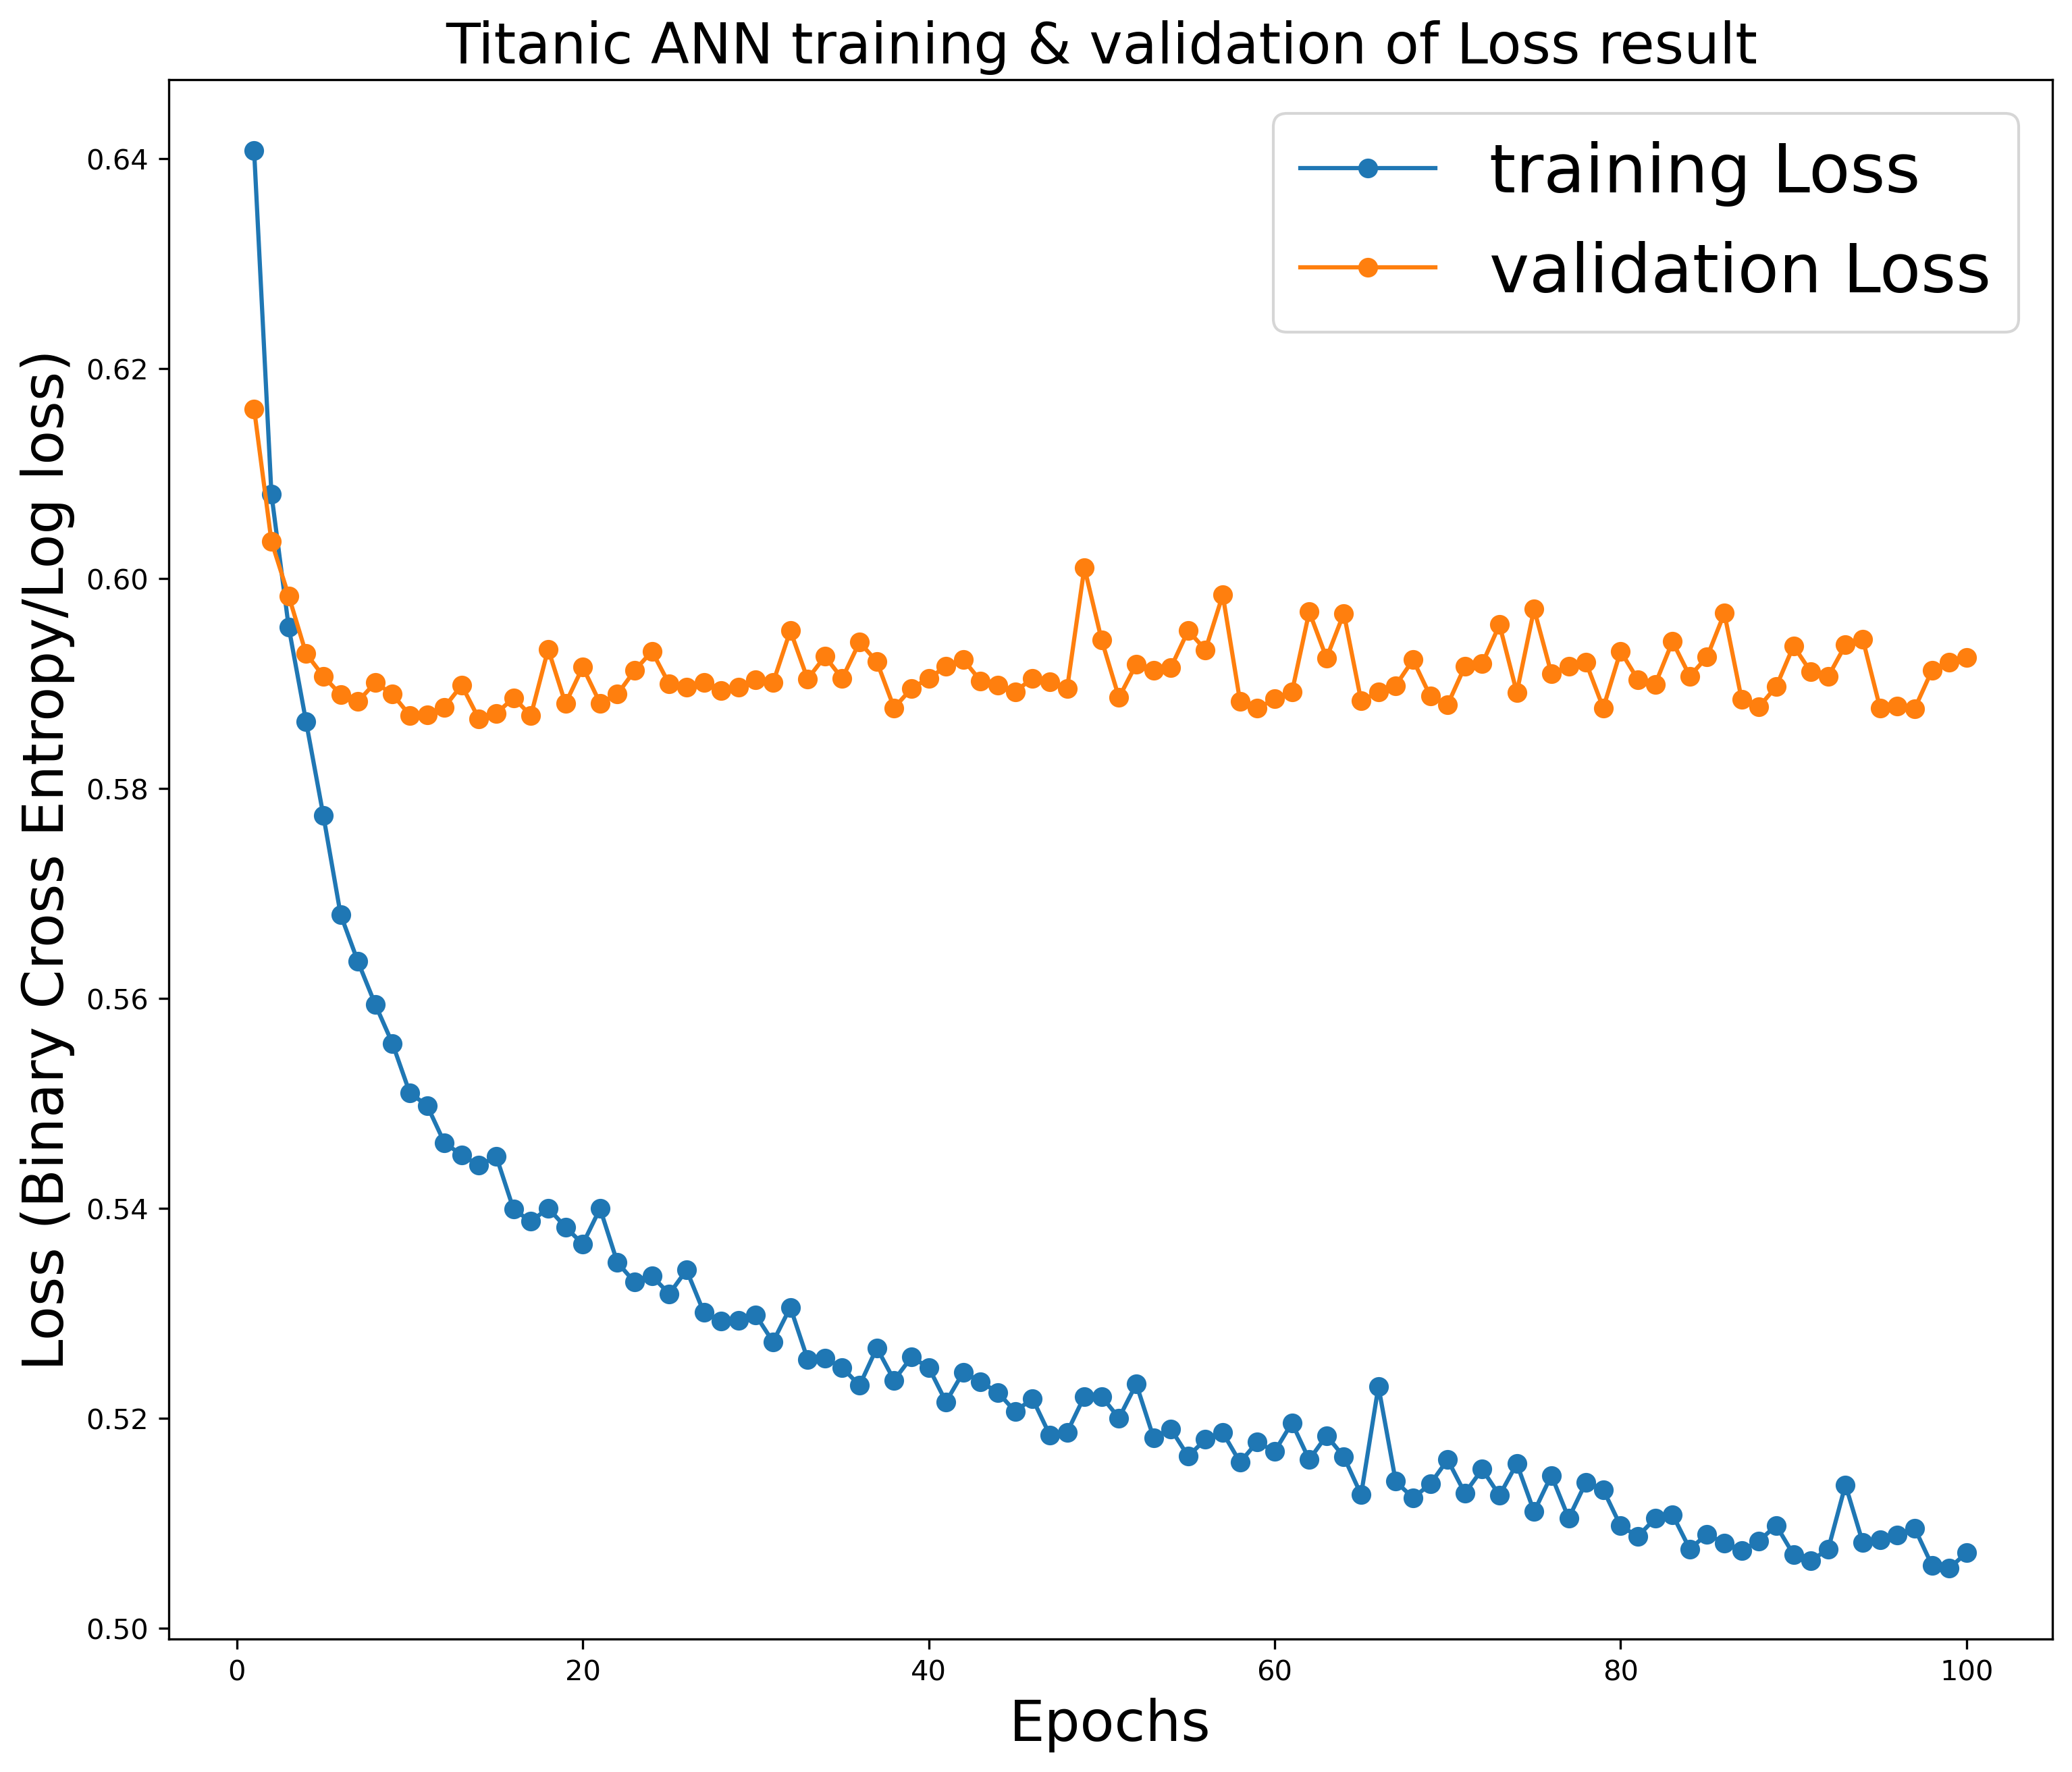

In [140]:
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Binary Cross Entropy/Log loss)',fontsize=20)
plt.title('Titanic ANN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='o',label='training Loss')
plt.plot(epochs, val_loss_values,marker='o',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

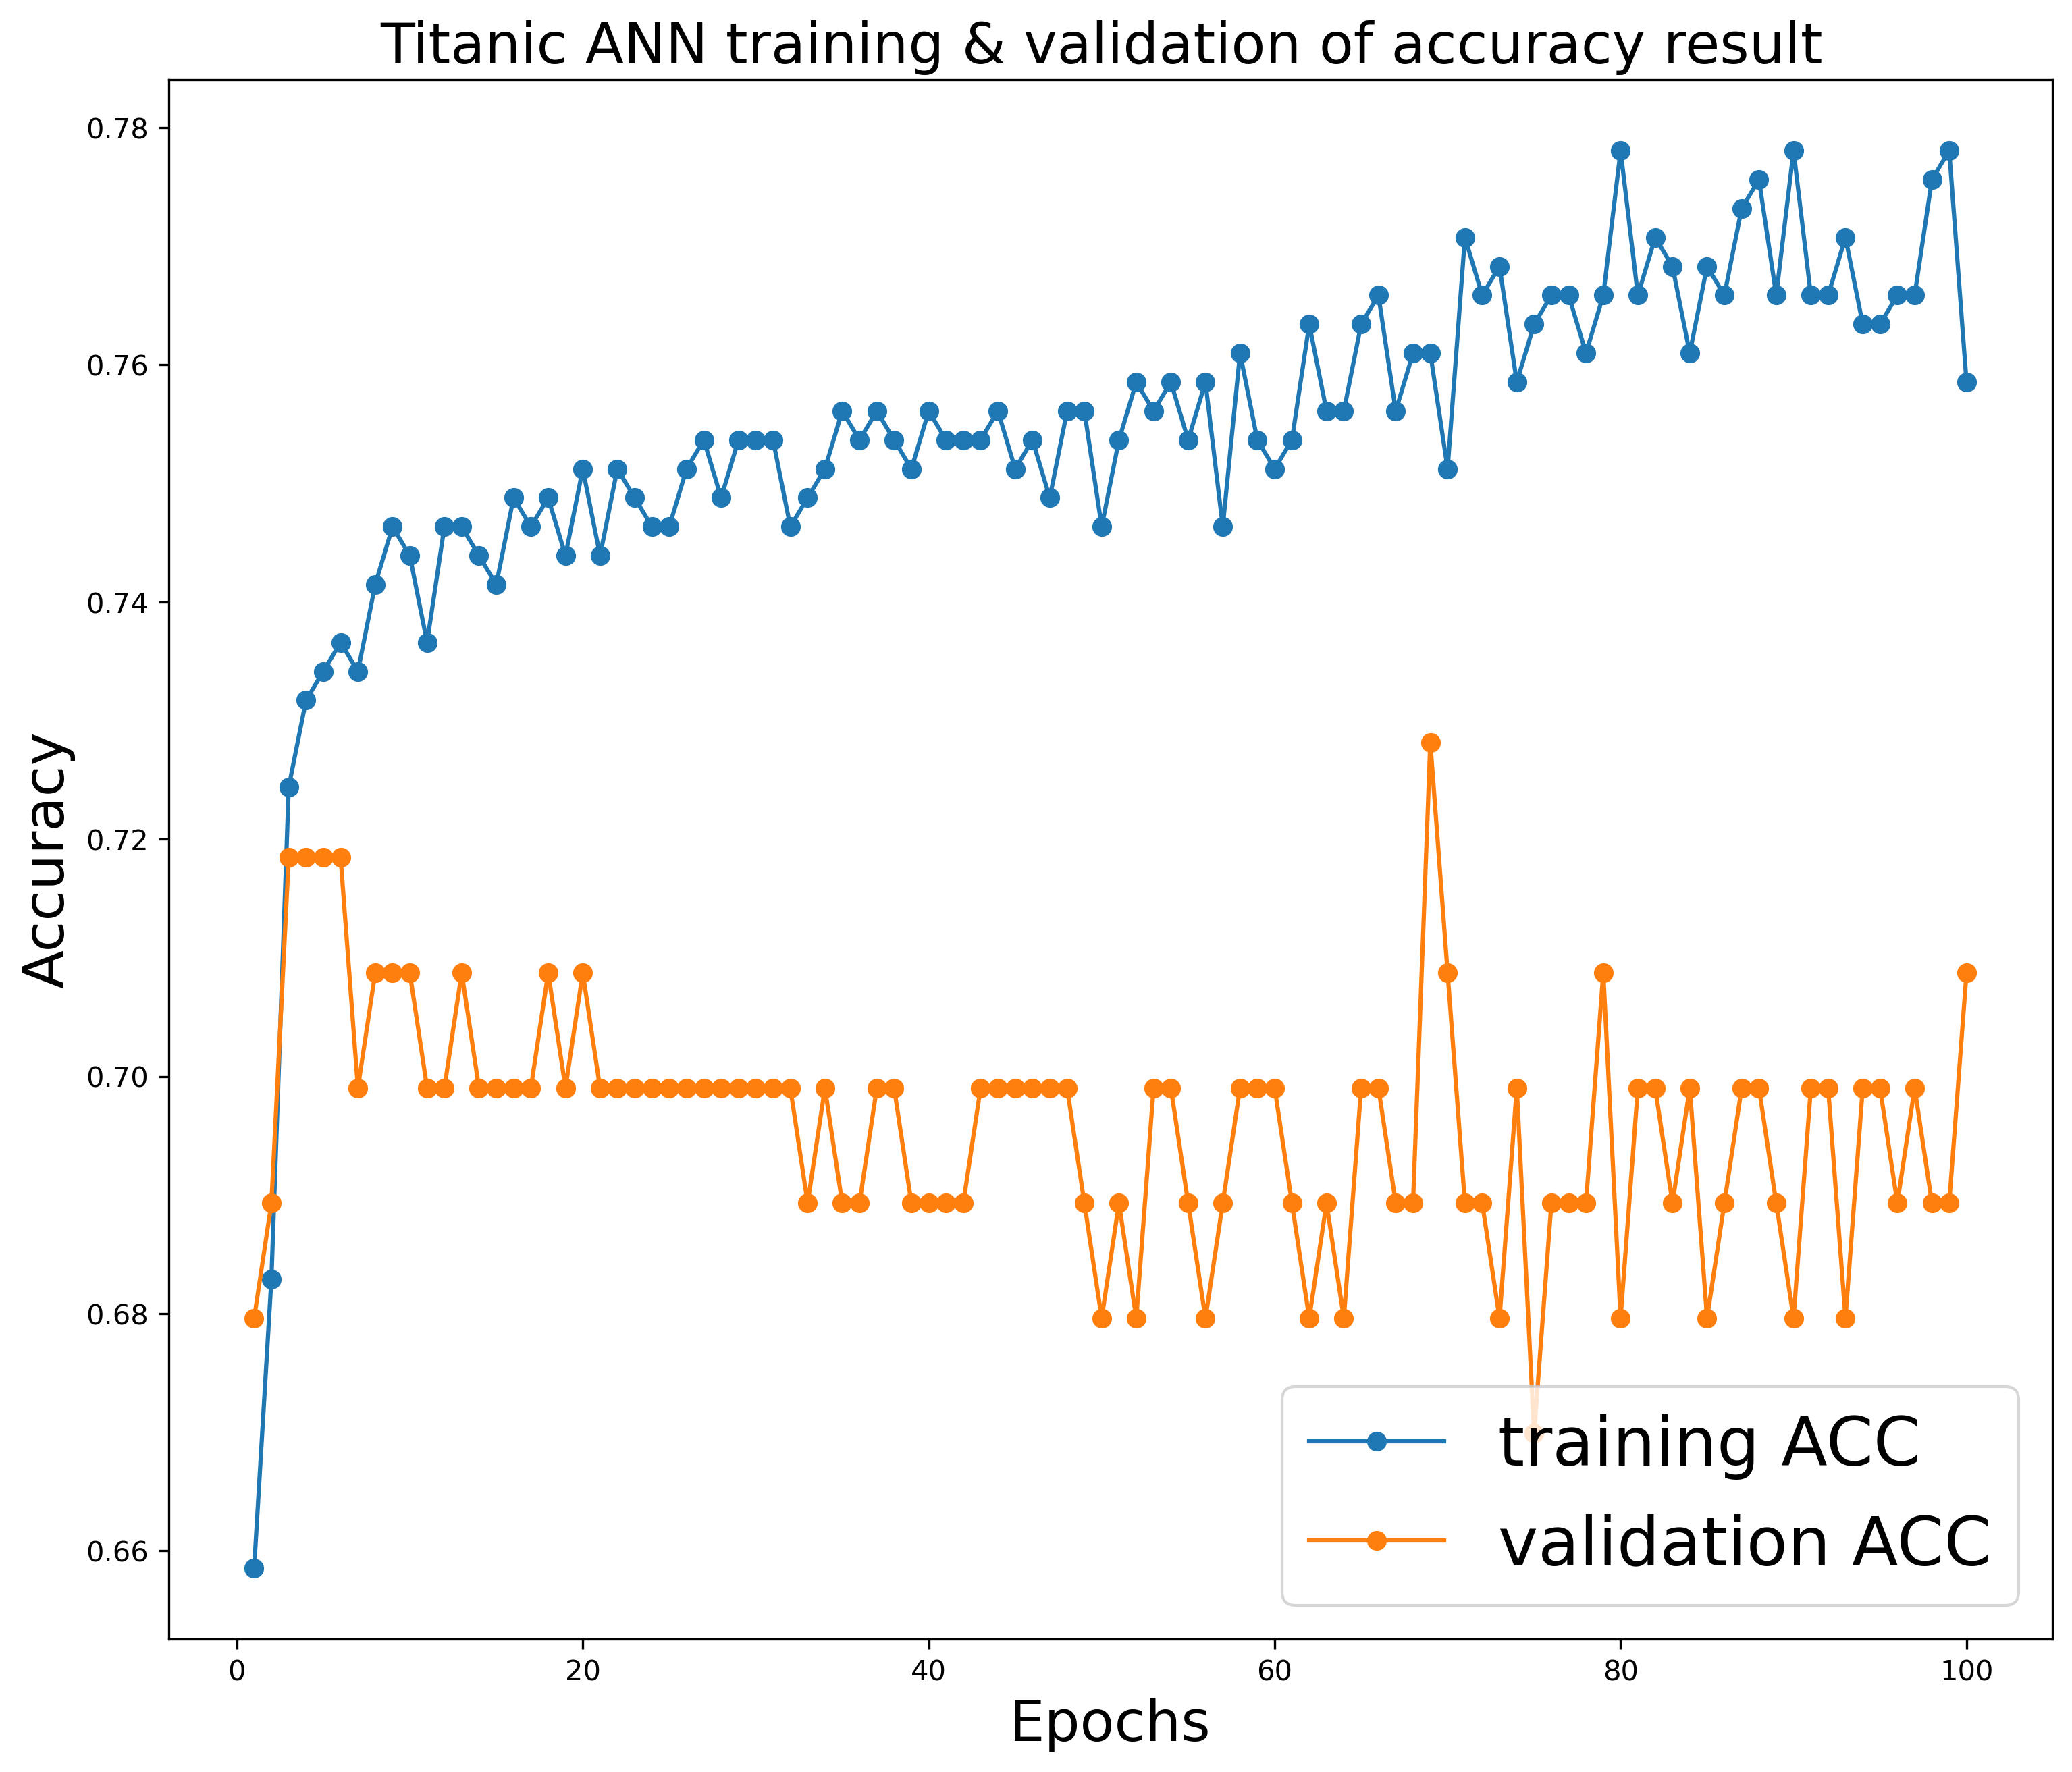

In [141]:
training_acc_values=modeling_result['accuracy']
val_acc_values=modeling_result['val_accuracy']
epochs=range(1,len(training_acc_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.title('Titanic ANN training & validation of accuracy result ',fontsize=20)

plt.plot(epochs, training_acc_values,marker='o',label='training ACC')
plt.plot(epochs, val_acc_values,marker='o',label='validation ACC')
plt.legend(loc=4,fontsize=24)
plt.show()

In [142]:
model.save('/Users/weiziyao/Desktop/作業/titanic_ANN_trained_model.h5')
print('Model has been saved...')

Model has been saved...


In [143]:
ANN_model=keras.models.load_model('/Users/weiziyao/Desktop/作業/titanic_ANN_trained_model.h5')
print('Model successfully loaded...')

Model successfully loaded...


In [144]:
prediction=ANN_model.predict_on_batch(x_test)
prediction

array([[0.44358435],
       [0.48322764],
       [0.453683  ],
       [0.4723176 ],
       [0.4267516 ],
       [0.43939948],
       [0.4656227 ],
       [0.40846834],
       [0.45767954],
       [0.45360866],
       [0.46167645],
       [0.44405922],
       [0.44306833],
       [0.5094731 ],
       [0.4305773 ],
       [0.46795887],
       [0.43233368],
       [0.4671228 ],
       [0.45567852],
       [0.3898237 ],
       [0.4374267 ],
       [0.39855996],
       [0.49176455],
       [0.45067164],
       [0.42545816],
       [0.4354441 ],
       [0.4535638 ],
       [0.47226432],
       [0.40762234],
       [0.4407625 ],
       [0.45855692],
       [0.43444425],
       [0.4284632 ],
       [0.44881764],
       [0.43582022],
       [0.432499  ],
       [0.44315225],
       [0.4398844 ],
       [0.45360765],
       [0.4471084 ],
       [0.4597072 ],
       [0.4715785 ],
       [0.5148148 ],
       [0.47274762],
       [0.44279492],
       [0.4772601 ],
       [0.45624295],
       [0.443

In [145]:
testing_prediction=(ANN_model.predict_on_batch(x_test) >= 0.5).astype('int')
testing_prediction

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [146]:
testing_acc=accuracy_score(y_test,testing_prediction)
testing_f1s=f1_score(y_test,testing_prediction,pos_label=1)
testing_pre=precision_score(y_test,testing_prediction,pos_label=1)
testing_sen=sensitivity_score(y_test,testing_prediction,pos_label=1)
testing_spe=specificity_score(y_test,testing_prediction,pos_label=1)
testing_cm=confusion_matrix(y_test,testing_prediction)
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

Testing result:
Testing ACC: 70.81
Testing f1s: 22.95
Testing pre: 100.0
Testing sen: 12.96
Testing spe: 100.0

Testing confusion matrix:
[[107   0]
 [ 47   7]]


In [70]:
ANN_model.evaluate(x_test,y_test,batch_size=64,verbose=1)

3/3 [==============================] - 0s 1ms/step - loss: 0.5111 - accuracy: 0.8012


[0.5111313462257385, 0.8012422323226929]